## Text Classification Using Spacy Word Embeddings

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("/kaggle/input/fake-and-real-news-data/Fake_Real_Data.csv")

df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [31]:
df.shape

(9900, 2)

In [32]:
df.columns

Index(['Text', 'label'], dtype='object')

In [33]:
df.label.value_counts()

# We got good f1 score here

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [34]:
df['label_num'] = df.label.map({'Fake': 0, 'Real': 1})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [35]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [36]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [37]:
# The method we are going to apply here looks like this

doc  = nlp("hey dog chilly mother car")
for token in doc:
    print(token.vector)

[-2.8451e-01  3.1007e-01 -5.7039e-01 -7.3056e-02 -1.7322e-01  3.4514e-01
  2.5064e-02 -7.4450e-01 -8.0003e-02  1.2706e+00 -1.5406e-01 -5.6205e-01
 -5.5205e-02 -2.5774e-01 -3.0460e-02 -1.0981e-01  9.6729e-02  5.1840e-01
 -9.2673e-02 -4.9251e-02  9.0157e-02  9.4389e-02  1.8056e-01 -6.1991e-02
  7.0905e-02 -2.7136e-01 -8.5007e-02 -1.1178e-01  5.1096e-01  7.3177e-02
 -7.3800e-02  4.1613e-01  4.7057e-02  5.6230e-02 -3.6250e-01  3.0078e-01
 -5.4107e-02  1.5917e-01 -3.2806e-01  4.1204e-02 -7.0225e-02 -1.3349e-01
 -2.0442e-01 -1.8118e-01  3.0158e-02  2.4373e-01  1.5164e-01 -1.1980e-01
  3.4054e-01  1.4416e-01  2.1975e-01  3.8064e-01  3.7723e-02  1.3055e-01
 -2.1014e-01 -1.0448e-01 -1.2170e-01  6.1660e-02 -2.7357e-01  4.7729e-02
 -7.5394e-01 -4.2806e-02 -3.0941e-01 -2.1225e-01 -6.1922e-02 -4.8522e-01
 -2.2137e-01  3.1217e-01  1.1897e-01 -3.5439e-01  2.2392e-01  8.9839e-03
  2.4551e-01  1.0141e-02  1.0417e-01  3.3599e-02  2.3849e-01  2.3122e-01
 -7.2279e-02  5.2569e-01  2.6722e-02  3.7336e-01 -2

In [39]:
df['Vector'] = df['Text'].apply(lambda x: nlp(x).vector)

In [40]:
df.head()

,Text,label,label_num,Vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [43]:
X = df['Vector'].values
y = df['label_num']

X.shape, y.shape

((9900,), (9900,))

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Vector.values, y, test_size = 0.2, random_state = 42, stratify = y)

X_train.shape, y_train.shape

((7920,), (7920,))

In [63]:
# To convert the 1D arary to 2D array

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [64]:
X_train_2d

array([[-0.09369611,  0.16201998, -0.02663852, ..., -0.09043932,
         0.0350087 ,  0.04886221],
       [-0.01777464,  0.11450334, -0.01998657, ..., -0.04322768,
        -0.06437095,  0.08493692],
       [-0.09784509,  0.15373023, -0.04763199, ..., -0.06323659,
        -0.00202328,  0.04002811],
       ...,
       [-0.08511816,  0.16148856, -0.11992247, ..., -0.08779272,
         0.0156817 ,  0.04807866],
       [-0.13950083,  0.13617502, -0.05417757, ..., -0.08657333,
         0.00468774,  0.06997155],
       [-0.08959162,  0.15804002, -0.07427843, ..., -0.07306737,
        -0.02488085,  0.05829404]], dtype=float32)

In [68]:
# To remove negetive values and scale the dataset

from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
X_train_scaled = s.fit_transform(X_train_2d)
X_test_scaled = s.transform(X_test_2d)
X_train_scaled

array([[0.41501242, 0.566429  , 0.4877496 , ..., 0.45384118, 0.65654516,
        0.43024665],
       [0.6788725 , 0.35763094, 0.50640154, ..., 0.6148391 , 0.29382592,
        0.5430783 ],
       [0.4005929 , 0.5300021 , 0.42888433, ..., 0.54660606, 0.52138454,
        0.40261605],
       ...,
       [0.44482452, 0.56409395, 0.22618312, ..., 0.46286643, 0.5860048 ,
        0.42779592],
       [0.2558211 , 0.45286086, 0.41053063, ..., 0.46702468, 0.54587865,
        0.49627078],
       [0.4292773 , 0.5489403 , 0.35416818, ..., 0.5130818 , 0.43795824,
        0.45974678]], dtype=float32)

In [75]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.943939393939394

In [76]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scaled)

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1000
           1       0.96      0.93      0.94       980

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



Text(95.72222222222221, 0.5, 'Truth')

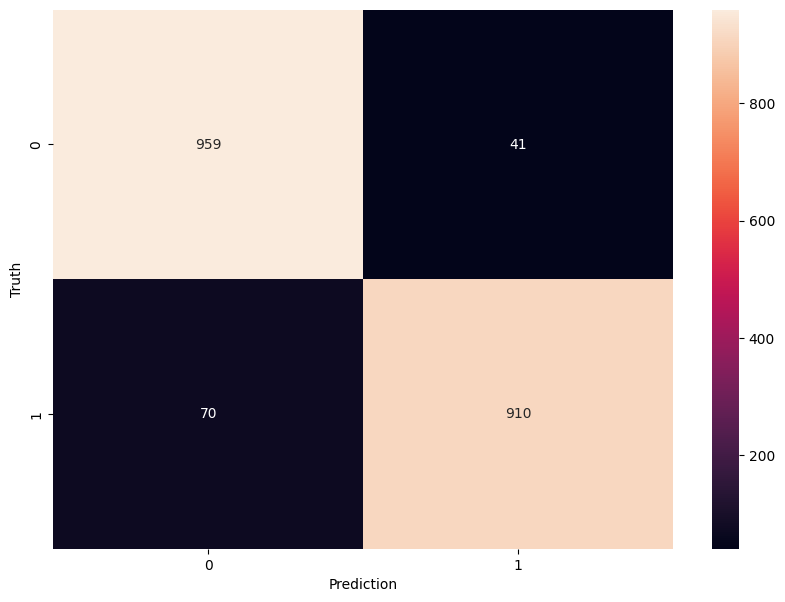

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [78]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.9767676767676767

In [79]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scaled)

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(95.72222222222221, 0.5, 'Truth')

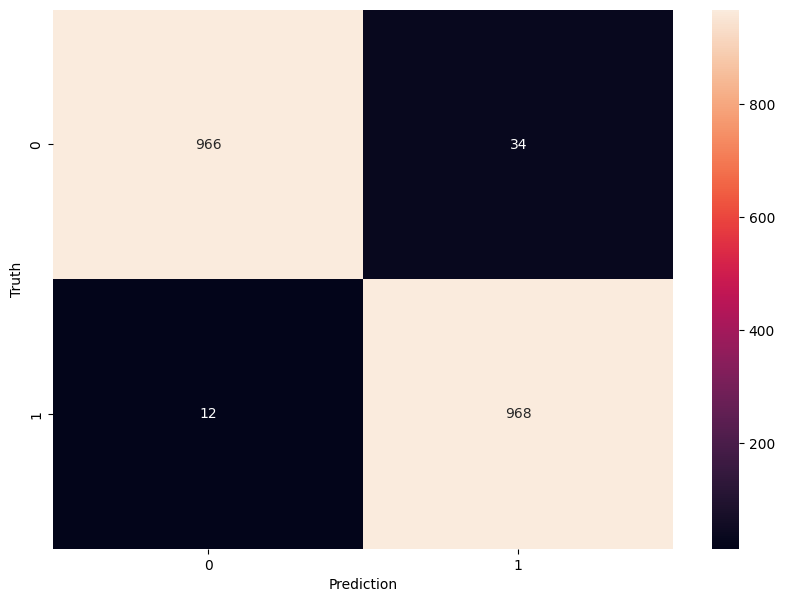

In [80]:
cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')